# Bernstein-Vazirani algorithm

Example of the Bernstein-Vazirani algorithm without entanglement. It takes in a hidden integer which can be revealed by querying the oracle.

For example:
Secret number = 101001

Taking the dot product of the secret number tells you that there are three 1's but not their location. Classical algorithms work out the position of the secret number by guessing each configuration (eg. 000001, 000010..) until the correct one is found.

The quantum algorithm is able to get the secret number in one go.

The algorithm assumes that someone has handed you a black box that performs a function however you cannot look inside the oracle to see what it does.

For more detail see: https://www.youtube.com/watch?v=sqJIpHYl7oo

In [2]:
from qiskit import QuantumCircuit, IBMQ
# tool to plot output histogram of states
from qiskit.visualization import plot_histogram
# used to look at progress of job (when sent to real device)
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

In [3]:
secret_number = '1010'

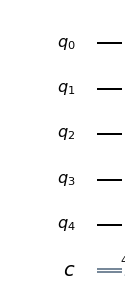

In [4]:
len_secret_no = len(secret_number)

# creating the quantum circuit
# QuantumCircuit(no of quantum bits, no of classical bits)
circuit = QuantumCircuit(len_secret_no + 1, len_secret_no)
circuit.draw(output='mpl')

In [52]:
circuit.x(len_secret_no)
# adding a barrier to the circuit 
# just to divide sections, for visualisation purposes
circuit.barrier()

# applying a Hadamard gate to each qubit
circuit.h(range(len_secret_no + 1))
circuit.barrier()

# for each 1 in the secret number a CNOT gate is added to 
# the respective qubit
for indx, value in enumerate(reversed(secret_number)):
    if value == '1':
        circuit.cx(indx, len_secret_no)
circuit.barrier()

# applying a Hadamard gate to each qubit
circuit.h(range(len_secret_no + 1))
circuit.barrier()

# adding measurement gates to the end of each qubit
circuit.measure(range(len_secret_no), range(len_secret_no))

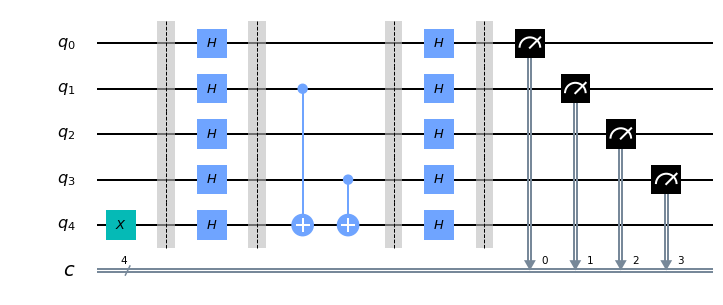

In [53]:
# drawing the circuit
circuit.draw(output='mpl')

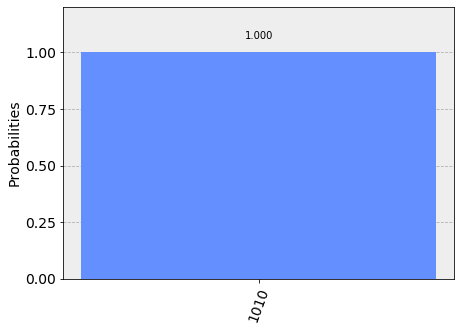

In [55]:
# running the circuit on the quantum simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
# plotting histogram of results
plot_histogram(result.get_counts(circuit))

In [46]:
# running the circuit on the real quantum device
backend = least_busy(IBMQ.backends(simulator=False))
compiled = transpile(circuit, backend=backend, optimization_level=1)
job = execute(compiled, backend=backend, shots=2048)
job_monitor(job)

/home/desiree/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


Job Status: job has successfully run


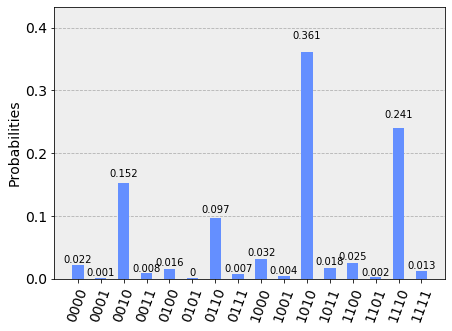

In [47]:
results = job.result()
answer = results.get_counts(circuit)
plot_histogram(answer)